# Preparation & Data Understanding

## Importing and Unzipping Datasets

In [18]:
from google.colab import drive
import os

# Mount to google Drive
drive.mount('/content/drive')
project_path = '/content/drive/MyDrive/BCC_Freepass_DS'

# Check the folder
if os.path.exists(project_path):
  print("Folder found!")
  print(os.listdir(project_path))
else:
  print("Folder not found.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder found!
['Datasets_Freepass.zip']


In [19]:
import zipfile

# Extract and create a temporary folder for colab
zip_path = os.path.join(project_path, 'Datasets_Freepass.zip')
extract_path = '/content/dataset'

if not os.path.exists(extract_path):
  print("Extracting files..")
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
  print("Extraction Successful!")
else:
  print("Folder already exists.")


Folder already exists.


### Data Exploration

In [22]:
import os

# Path to annotations
annot_path = '/content/dataset/train/annotations'

# Check if the folder exists & reads the first 5 files
if os.path.exists(annot_path):
  files = os.listdir(annot_path)
  files.sort()
  print(f"Found {len(files)} files in annotions")
  print("First 5 files:", files[:5])

  # Check file format
  if len(files) > 0:
    first_file = files[0]
    with open(os.path.join(annot_path, first_file)) as f:
      content = f.read()

  print(f"\nFirst file: {first_file}")
  print(f"File format: {content}")

else:
  print(f"{annot_path} is not found.")

Found 2208 files in annotions
First 5 files: ['2015_00001.png.txt', '2015_00004.jpg.txt', '2015_00006.jpg.txt', '2015_00010.jpg.txt', '2015_00013.jpg.txt']

First file: 2015_00001.png.txt
File format: % bbGt version=3
Bicycle 204 28 271 193 0 0 0 0 0 0 0



### Visualisasi & Verifikasi Koordinat

Membuka gambar: /content/dataset/train/images/2015_00001.png


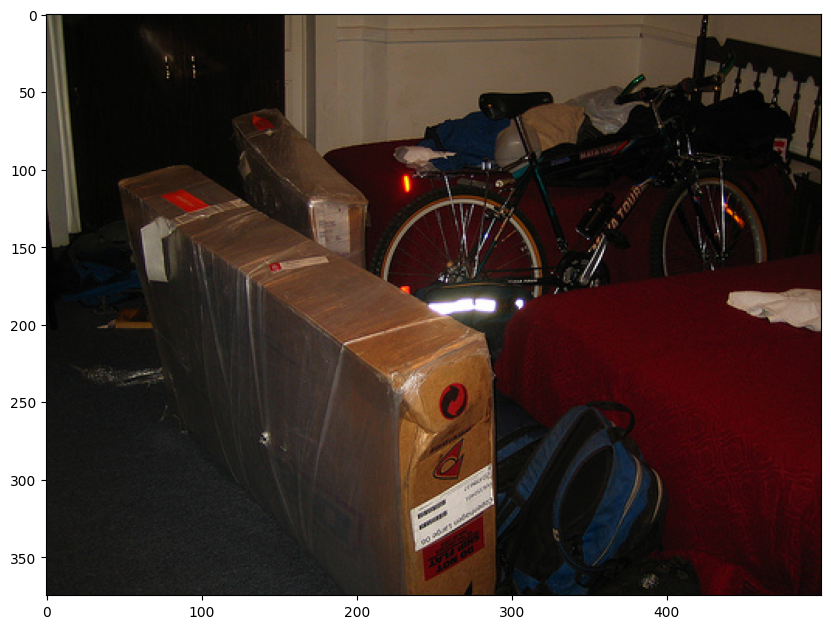

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# Setup path
img_filename = '2015_00001.png'
txt_filename = '2015_00001.png.txt'

img_path = os.path.join('/content/dataset/train/images', img_filename)
txt_path = os.path.join('/content/dataset/train/annotations', txt_filename)

# Check and read the image
if not os.path.exists(img_path):
  # Change .png to .jpg if needed
  img_path = img_path.replace('.png', '.jpg')

print(f"Membuka gambar: {img_path}")
im = Image.open(img_path)

# Setup plotting, 1 canvas with 10x10 inches
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(im)

# Read the coordinate & draw the square
with open(txt_path, 'r') as f:
  lines = f.readlines()

  for line in lines:
    if lines.statrtswith('%'): continue # Lewati header

    parts = line.strip().split()
    label = parts[0]

    # Hipotesis format caltech adalah [x_min, y_min, width, height]
    x = float(parts[1])
    y = float(parts[2])
    w = float(parts[3])
    h = float(parts[4])